# IÐN303G Tæknileg kerfi - Lausn á Heimadæmi 1

## Inngangur
Markmiðið með þessu verkefni er að gera fræðilegt líkan af vatnstanki með frjálsu útflæði og nota það til að spá 
fyrir um jafnvægishæð vatns miðað við gefnar forsendur um flatarmál botnflatar, flatarmál úttaks á botni tanksins og innflæði.

Niðurstöður verkefnisins eru settar fram í þessu Jupyter skjali. Fyrst er fræðilegt líkan af tankinum sett upp og
þar á eftir er með hermun spáð fyrir um breytingar í vatnshæð þar til jafnvægishæð er náð. Í lokaorðum eru niðurstöðurnar dregnar
saman.

## Fræðilegt líkan

Kerfið sem um ræðir er vatnstankur með botnflatarmálið $A$ og á botninum er úttak með flatarmál $a$. Samkvæmt fyrirmælum má gera ráð fyrir að um útstreymið úr tanknum ($q_{út}(t)$) gildi:

\begin{equation} \label{eq:model_tank_outflow}
q_{út}(t)=a\sqrt{2gh(t)}
\end{equation}

þar sem $g$ táknar þyngdarhröðun og $h(t)$ vatnshæðina í tanknum.

Vatnshæðin í tanknum er háð bæði inn- og útflæðinu. Ef innflæðið er meira en útflæðið hækkar vatnsborðið og það lækkar ef útrennslið er meira en innrennslið. Það er vegna þess að mismunur á inn- og útrennsli er jafn breytingu 
í rúmmáli vatnsins í tanknum sem tákna má stærðfræðilega sem

\begin{equation} \label{eq:model_tank_1}
\frac{dV(t)}{dt}=\frac{dh(t)}{dt}A=q_{inn}(t)-q_{út}(t)
\end{equation}

Ef við setjum jöfnuna fyrir útflæðið inn í jöfnuna hér fyrir ofan fáum við

\begin{equation} \label{eq:model_tank_2}
\frac{dh(t)}{dt}A=q_{inn}(t)-a\sqrt{2gh(t)}
\end{equation}

Ef $q_{inn}(t)=Q_0$, þ.e. innflæðið er fast frá því að það er sett í gang við $t_0$, þá hækkar hæðin þar til innflæðið er jafnt og útflæðið. Þá verður $dh(t)/dt=0$ og hægt að finna jafnvægishæðina ($h_0$) út frá

\begin{equation} \label{eq:tank_eq_height_1}
Q_0=a\sqrt{2gh_0}
\end{equation}

\begin{equation} \label{eq:tank_eq_height_2}
h_0=\frac{1}{2g}\left(\frac{Q_0}{a}\right)^2
\end{equation}

Við getum hinsvegar reiknað út hvernig $h(t)$ nær jafnvægi með því að herma eftirfarandi (ólínulegu) diffurjöfnu

\begin{equation} \label{eq:model_tank_3}
\frac{dh(t)}{dt}A+a\sqrt{2gh(t)}=Q_0
\end{equation}

## Hermun

Í þessum hluta hermun við jöfnuna hér að ofan. Við nýtum okkur að afleiðan af $f(x)$ er skilgreind sem

\begin{equation} \label{eq:derivation_1}
f'(t)=\lim_{\Delta t \to 0}\frac{f(t+\Delta t)-f(t)}{\Delta t}
\end{equation}

og ef við veljum $\Delta t$ nægilega lítið þá getum við skrifað
    
\begin{equation} \label{eq:derivation_2}
f(t+\Delta t)=f(t)+{\Delta t}f'(t)
\end{equation}

Ef upphafstími hermunarinnar er $t_0$ og $f(t_0)$ er gefið getum við reiknað $f(t_i)$ fyrir $i \in {1,2,...,n}$ með 

\begin{equation}
f(t_i)=f(t_{i-1})+{\Delta t}f'(t_{i-1})
\end{equation}

þar sem $t_i=t_{i-1}+{\Delta t}$. 

Fyrir diffurjöfnuna okkar gildir að

\begin{equation} 
h'(t)A+a\sqrt{2gh(t)}=Q_0
\end{equation}

sem við endurröðum til að fá

\begin{equation}
h'(t)=\frac{1}{A}\left(Q_0-a\sqrt{2gh(t)}\right)
\end{equation}

Grunnjafnan í hermuninni verður því

\begin{equation}
h(t_i)=h(t_{i-1})+{\Delta t}h'(t_{i-1})=h(t_{i-1})+{\Delta t}\frac{1}{A}\left(Q_0-a\sqrt{2gh(t_{i-1})}\right)
\end{equation}

þar sem tankurinn er tómur í upphafi er $h(t_0)=0$.

Hér fyrir neðan er kóði sem keyrir hermunina fyrir valin gildi á $A$, $a$, og $Q_0$ og birtir niðurstöður á myndrænan hátt. Fræðileg jafnvægishæð er merkt inn sem aðfella.

Útreiknuð jafnvægishæð:  0.09894646840072047 m


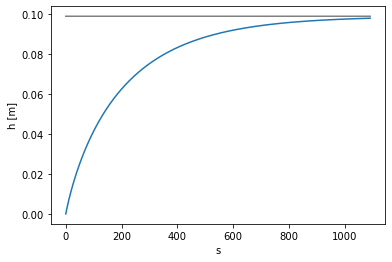

In [88]:
import numpy as np
import matplotlib.pyplot as plt

#Breytur tanksins (Einingar: A (m^2), a (m^2), Q_0 (m^3/s))
A = 0.3 * 0.3
a = (0.004)**2 * np.pi
Q_0 = 7e-5

#Þyngdarhröðun
g = 9.8

#Útreiknuð jafnvægishæð
h_eq = (1 / (2 * g)) * pow(Q_0 / a, 2)
print("Útreiknuð jafnvægishæð: ", h_eq, "m")

# Hermun
delta_t = 1
def_eq = 0.99 * h_eq # Skilgreini hvar jafnvægi er náð, þ.e. hvenær hermun er stöðvuð.
T_simulation = 60 * 60 # Set hámarkstíma á hermun.
N_simulation = int( T_simulation / delta_t ) # Bý til stærri vigur en ég þarf. Er núll eftir að hermun líkur.
h = np.zeros(N_simulation)

for t in range(1,N_simulation):
    h[t] = h[t-1] + delta_t * (1 / A) * (Q_0 - a * np.sqrt(2 * g * h[t-1]))
    if( h[t] > def_eq):
        break

# Myndir
# Stytti h vigur með því að henda burtu núllum í lokin. Passa að aðrir vigar séu jafn langir.
nz_idx = np.nonzero(h)
h = h[0:nz_idx[0][-1]]
time = np.arange(len(h)) * delta_t
h_eq_calc = h_eq * np.ones(len(h))

fig, ax = plt.subplots()
ax.set_xlabel('s')
ax.set_ylabel('h [m]')

ax.plot(time, h)
ax.plot(time, h_eq_calc ,color="gray")

plt.show()

## Lokaorð
Hermun sýnir að hæðin vex hratt í fyrstu þegar innflæðið er talsvert meira en útflæðið en vex svo hægar eftir því sem útflæðið færist nær innflæðinu. Niðurstöður hermunarinnar um jafnvægishæð eru í samræmi við útreiknað gildi. Það er áhugavert að samkvæmt líkaninu er jafnvægishæðin einungis háð innflæði og flatarmáli úttaksins en óháð flatarmáli tanksins.